In [1]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Перейдём к следующему датасэту.

На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для новых поступающих данных. Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

От вашего ответа зависит судьба человечества!

In [2]:
invasion_df = pd.read_csv('C:\\Users\\UserOfPC\\Documents\\Основы Data Science Stepik\\Датасеты\\invasion.csv')

In [3]:
invasion_df.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [4]:
invasion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   class               500 non-null    object 
 1   g_reflection        500 non-null    float64
 2   i_reflection        500 non-null    float64
 3   speed               500 non-null    float64
 4   brightness          500 non-null    float64
 5   time_of_observance  500 non-null    int64  
 6   volume              500 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 27.5+ KB


In [5]:
X = invasion_df.drop('class', axis=1)

In [6]:
y = invasion_df['class']

In [7]:
clf_rf = RandomForestClassifier()

In [8]:
clf_rf.fit(X, y)

RandomForestClassifier()

In [9]:
test_df = pd.read_csv('C:\\Users\\UserOfPC\\Documents\\Основы Data Science Stepik\\Датасеты\\operative_information.csv')

In [10]:
y_pred = clf_rf.predict(test_df)

In [11]:
y_pred = pd.DataFrame(y_pred)
y_pred.value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [12]:
feature_importances = clf_rf.feature_importances_

In [13]:
feature_importances = pd.DataFrame({'features': list(X),
                                    'feature_importances': feature_importances})

In [14]:
feature_importances = feature_importances.sort_values('feature_importances', ascending=False)

In [16]:
feature_importances

,features,feature_importances
3,brightness,0.289990
5,volume,0.283477
0,g_reflection,0.210199
2,speed,0.131250
1,i_reflection,0.083869
4,time_of_observance,0.001216


Благодаря вашим стараниям войска захватчиков были разгромлены, но война ещё не окончена! Вас повысили и перевели на новое направление (новые должности - новые задачи) - теперь нужно выявлять опасные регионы космоса, где могут находиться жукеры.

Проанализируйте имеющиеся данные об опасности разных регионов космоса и укажите наиболее вероятные причины угрозы

In [17]:
space_df = pd.read_csv('C:\\Users\\UserOfPC\\Documents\\Основы Data Science Stepik\\Датасеты\\space_can_be_a_dangerous_place.csv')

In [18]:
space_df.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


<Axes: >

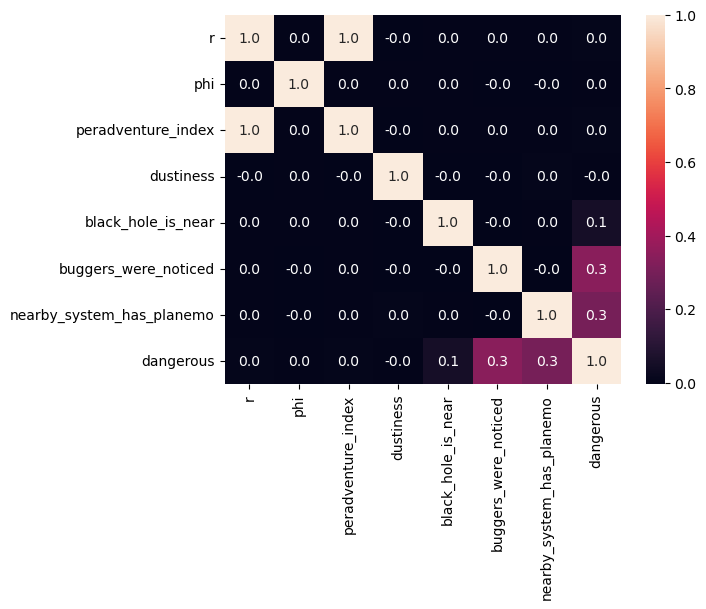

In [19]:
sns.heatmap(space_df.corr(), annot=True, fmt=".1f")

Из тепловой карты корреляций, видим положительную корреляцию между целевой переменной и переменных: наличие планемо и присутствие жукеров.